# EU City Temperatures

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Preprocessing/analysis

### Load the CSV file

In [46]:
df = pd.read_csv('EuCitiesTemperatures.csv')
df.head(10)

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,NaN,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,NaN,27.57,5.28
8,Orsha,Belarus,9.48,no,no,NaN,NaN,4.93
9,Pinsk,Belarus,9.48,no,no,NaN,NaN,6.42


### Fill in the missing latitude and longitude values

In [57]:
# # Calculate the average latitude and longitude for each country
# country_lat_lon = df.groupby('country')['latitude', 'longitude'].mean().round(2)

# # Loop through the DataFrame and fill in missing latitude and longitude values with the average for that country
# for i, row in df.iterrows():
#     if pd.isnull(row['Latitude']):
#         country = row['Country']
#         df.at[i, 'Latitude'] = country_lat_lon.loc[country]['Latitude']
#     if pd.isnull(row['Longitude']):
#         country = row['Country']
#         df.at[i, 'Longitude'] = country_lat_lon.loc[country]['Longitude']

# # Drop the Country column
# df.drop('Country', axis=1, inplace=True)

df['latitude'] = df.groupby('country')['latitude'].transform(lambda x: x.fillna(x.mean())).round(2)
df['longitude'] = df.groupby('country')['longitude'].transform(lambda x: x.fillna(x.mean())).round(2)
df.head(10)

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,14.02,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42


### Find the subset of cities in latitudes 40 - 60 and longitudes 15 - 30

In [52]:
subset = df[df['latitude'].between(40, 60, inclusive = 'both') & df['longitude'].between(15, 30, inclusive = 'both')]
subset

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
10,Brest,Belarus,9.48,no,no,52.10,23.70,6.73
16,Burgas,Bulgaria,7.10,yes,yes,42.51,27.47,NaN
18,Ruse,Bulgaria,7.10,yes,yes,43.85,25.97,NaN
19,Stara Zagora,Bulgaria,7.10,yes,yes,42.42,25.62,10.90
22,Brno,Czech Republic,10.55,yes,no,49.20,16.61,7.86
70,Debrecen,Hungary,9.82,yes,no,47.53,21.63,8.87
71,Gyor,Hungary,9.82,yes,no,47.70,17.63,9.65
72,Szeged,Hungary,9.82,yes,no,46.25,20.15,10.34


### Find the countries with a maximal number of such cities

In [55]:
country_counts = subset['country'].value_counts()

# Find the countries with the maximal number of cities in the subsetted DataFrame
max_count = country_counts.max()
max_countries = list(country_counts[country_counts == max_count].index)

print(max_countries)

4
['Poland', 'Romania']


### Fill in the missing temperature values

In [60]:
df['temperature'] = df.groupby(['EU','coastline'])['temperature'].transform(lambda x: x.fillna(x.mean())).round(2)
df.head(10)

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,14.02,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42


## Visualization

### Bar chart of number of cities in each region

In [59]:
region = df.groupby(['EU','coastline']).count()['city'].to_frame('city_count')
region

# plt.figure(figsize=(7, 5))
plt.title('Number of cities belonging to each of the regions')
plt.ylabel('count')
region['city_count'].plot(kind='bar')
plt.show()

city_count
EU  coastline            
no  no                 16
    yes                47
yes no                 14
    yes               136

### Scatter plot of cities' latitude/longitude

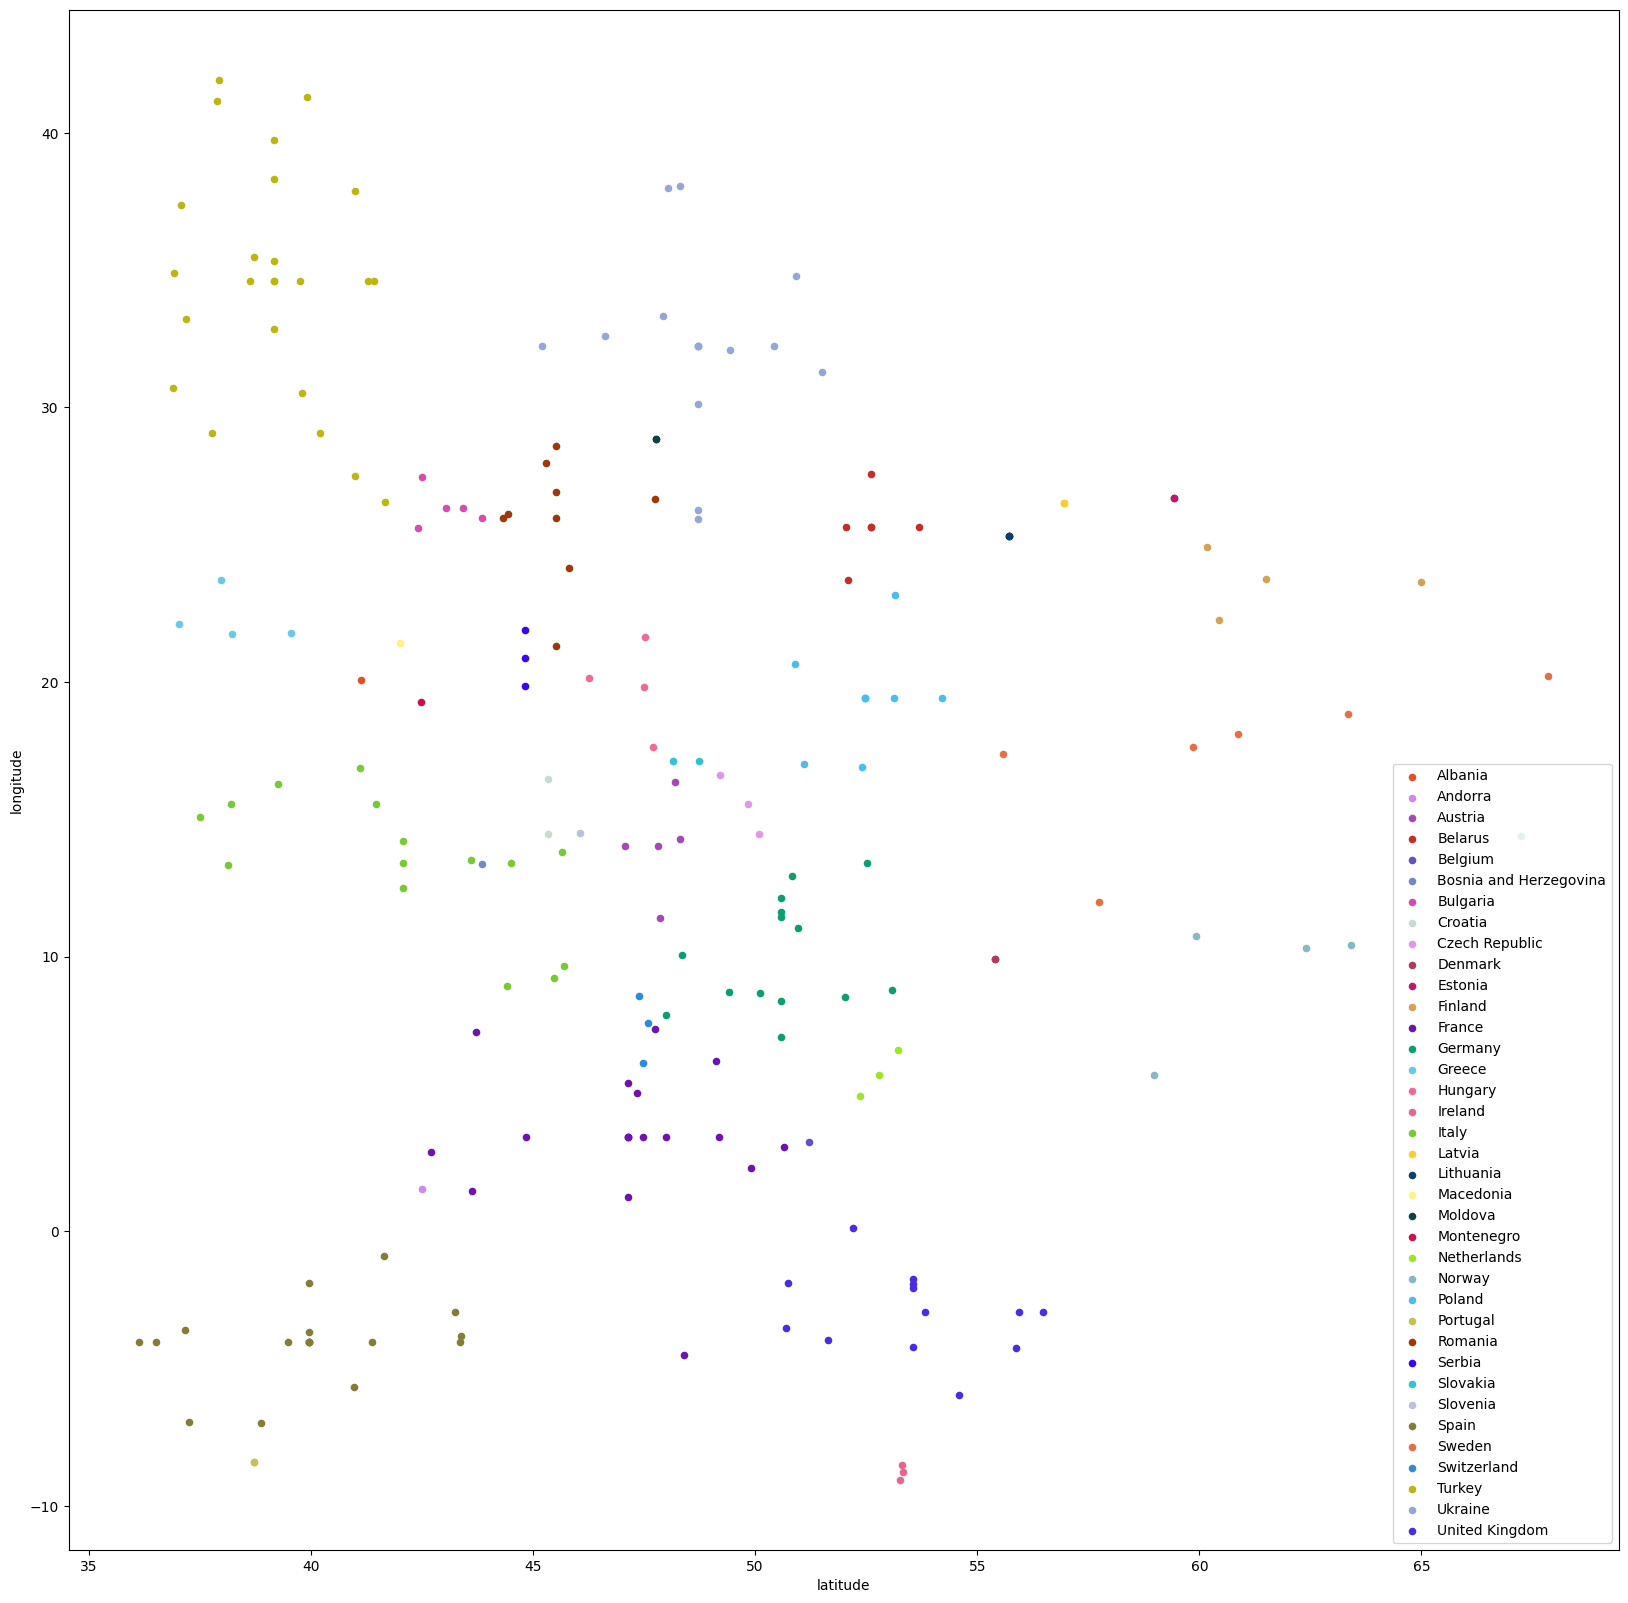

In [68]:
r = df['country'].value_counts()

from random import randint
colors = []
n = r.count()
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

countries = df['country'].unique()
    
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20,20)
for country,color in zip(countries,colors):
    dataframe = df[df['country'] == country]    
    dataframe.plot('latitude','longitude',ax=ax,kind='scatter',color=color,label=country)

### Histogram of country population

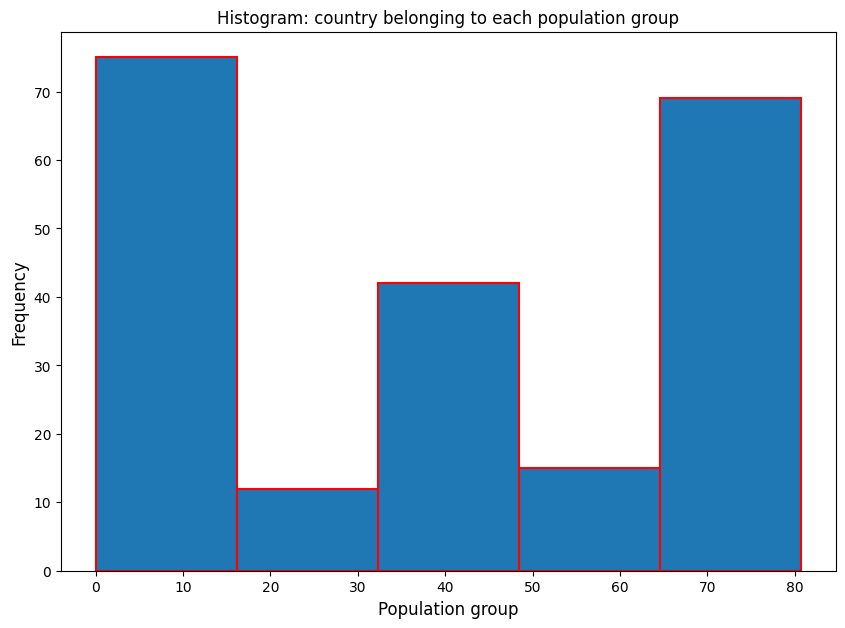

In [66]:
plt.figure(figsize=(10, 7))
plt.title('Histogram: country belonging to each population group')
plt.xlabel('Population group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.hist(df['population'], linewidth=1.5, edgecolor='r', bins=5)
plt.show()

### Scatter plots of city vs latitude for each region

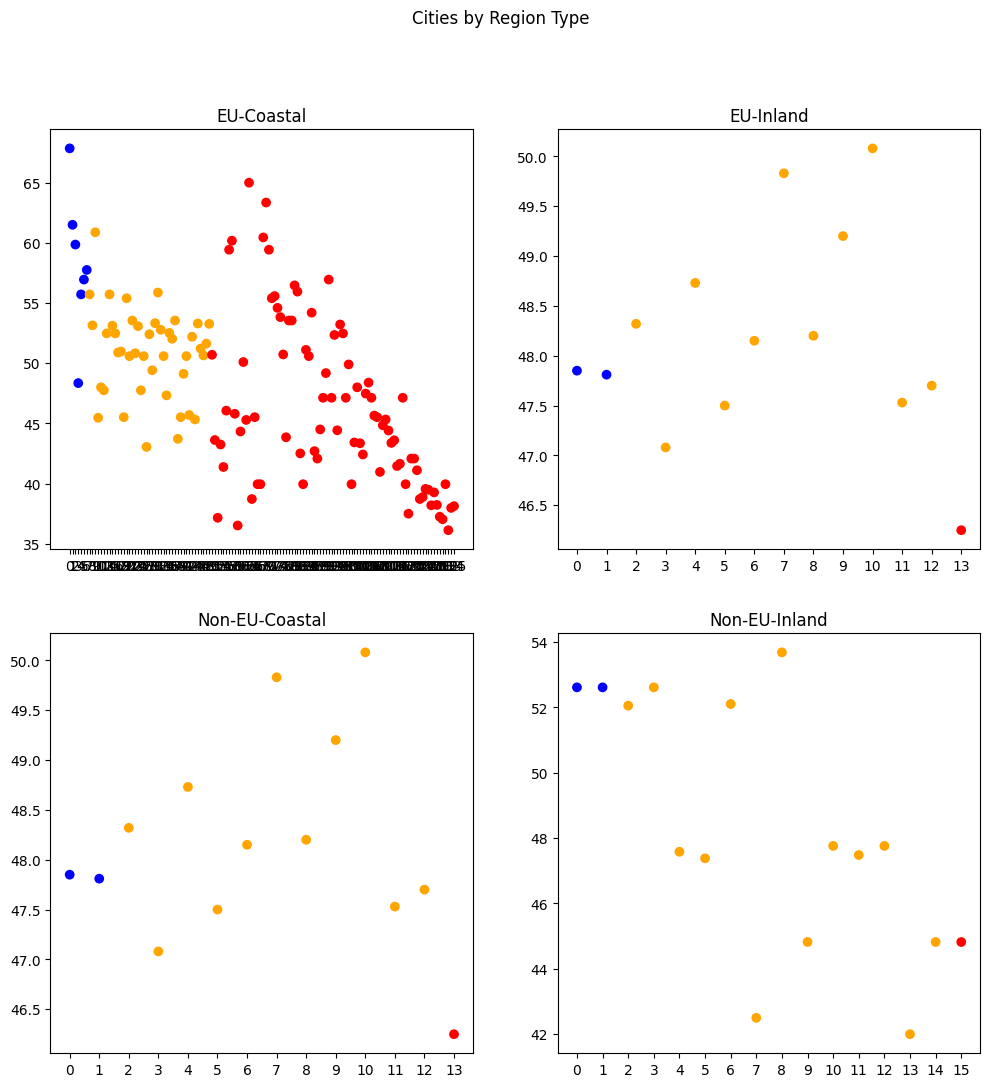

In [85]:
def get_color(temp):
    if temp > 10:
        return 'red'
    elif temp < 6:
        return 'blue'
    else:
        return 'orange'
    
region_types = ['EU-Coastal', 'EU-Inland', 'Non-EU-Coastal', 'Non-EU-Inland']

df_eu_coast = df[(df['EU'] == 'yes') & (df['coastline'] == 'yes')]
df_eu_nocoast = df[(df['EU'] == 'yes') & (df['coastline'] == 'no')]
df_noeu_coast = df[(df['EU'] == 'no') & (df['coastline'] == 'yes')]
df_noeu_nocoast = df[(df['EU'] == 'no') & (df['coastline'] == 'no')]

a = {'EU-Coastal': df_eu_coast, 'EU-Inland': df_eu_nocoast, 'Non-EU-Coastal': df_eu_nocoast, 'Non-EU-Inland':df_noeu_nocoast}
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
for i, region_type in enumerate(region_types):
    region_df = a.get(region_type)
    # Sort the DataFrame by temperature
    region_df = region_df.sort_values(by='temperature')
    # Add a new column to the DataFrame with a numerical index for each city
    region_df['Index'] = range(len(region_df))
    # Create a scatter plot with the index on the x-axis and latitude on the y-axis
    ax = axs[i//2, i%2]
    ax.scatter(region_df['Index'], region_df['latitude'], c=region_df['temperature'].apply(get_color))
    # Set the x-axis tick labels to the city names
    ax.set_xticks(range(len(region_df)))
    ax.set_xticklabels(range(len(region_df)))
    # Set the title of the subplot to the current region type
    ax.set_title(region_type)

# Add a main title for the entire figure
fig.suptitle('Cities by Region Type')

# Display the plot
plt.show()